### **Why Elasticsearch is Faster for Searches?** 🚀

1. **Inverted Index** → Pre-built word mapping for quick lookups (no row scanning).  
2. **Distributed Architecture** → Queries run in parallel across multiple nodes.  
3. **Full-Text Search Optimizations** → Handles typos, synonyms, and relevance scoring.  
4. **Efficient Caching** → Stores frequent queries in memory for faster results.  
5. **Near-Real-Time Indexing** → New data is searchable within seconds.  
6. **Flexible Data Storage** → No strict schema, handles diverse data types.  
7. **Advanced Aggregations** → Fast calculations (counts, sums, averages) on large datasets.  

🔹 **Best for:** Large datasets, logs, product searches, and real-time analytics.

### Connect to Elasticsearch

In [35]:
from elasticsearch import Elasticsearch

es = Elasticsearch("http://localhost:9200")

print(es.ping())

True


### Create an Index

#### What is an Index in Elasticsearch?
An index in Elasticsearch is similar to a database in a relational database system. It is a collection of documents that share similar characteristics. Each document is stored as a JSON object and has a unique identifier.

In [36]:
index_name = "test_index"

if es.indices.exists(index='test_index'):
    es.indices.delete(index='test_index')  # Delete existing index to avoid conflicts
    print(f"Deleted existing index: test_index")

es.indices.create(index='test_index')
print(f"Created index: test_index")

Deleted existing index: test_index
Created index: test_index


In [37]:
doc = {
    "name": "John Doe",
    "age": 30,
    "occupation": "Software Engineer",
    "location": "San Francisco"
}

res = es.index(index=index_name, id=1, document=doc)
print(res)

{'_index': 'test_index', '_id': '1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1}


In [38]:
query = {
    "query": {
        "match": {
            "occupation": "Software Engineer"
        }
    }
}

res = es.search(index=index_name, body=query)
print(res)


{'took': 0, 'timed_out': False, '_shards': {'total': 1, 'successful': 1, 'skipped': 0, 'failed': 0}, 'hits': {'total': {'value': 0, 'relation': 'eq'}, 'max_score': None, 'hits': []}}


In [39]:
update_query = {
    "doc": {
        "age": 31
    }
}

es.update(index=index_name, id=1, body=update_query)

ObjectApiResponse({'_index': 'test_index', '_id': '1', '_version': 2, 'result': 'updated', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 1, '_primary_term': 1})

In [40]:
es.delete(index=index_name, id=1)


ObjectApiResponse({'_index': 'test_index', '_id': '1', '_version': 3, 'result': 'deleted', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 2, '_primary_term': 1})

### What is a Shard in Elasticsearch?
A shard is a subdivision of an index. Each index is split into multiple shards for better performance and fault tolerance.

Primary Shards: Store the actual data.
Replica Shards: Backup copies of primary shards for redundancy.
Each shard is an independent Lucene index that can be stored on a different node in a cluster.

Example: How Shards Improve Performance
Imagine we have 1 million documents in an index. Instead of storing all of them in a single server, we can distribute them across multiple shards, which can then be placed on different servers (nodes).

Creating an Index with Shards and Replicas

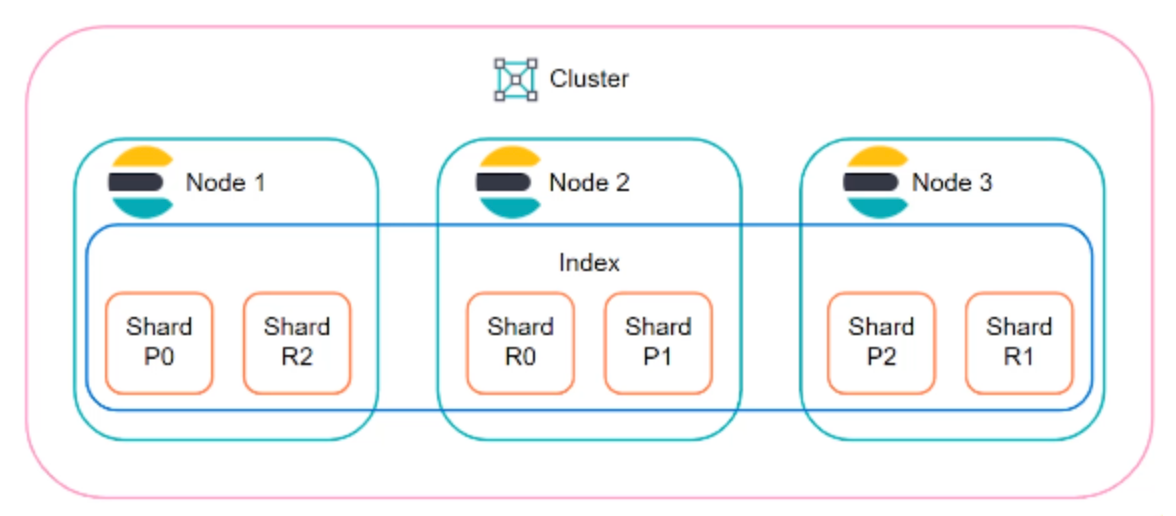

In [41]:
from elasticsearch import Elasticsearch
import time
from elasticsearch.helpers import bulk

# Connect to Elasticsearch
es = Elasticsearch("http://localhost:9200")

# Define index mappings
# sharded_mapping = {
#     "settings": {
#         "number_of_shards": 3,  # Multiple shards for parallel processing
#         "number_of_replicas": 1
#     },
# }

# unsharded_mapping = {
#     "settings": {
#         "number_of_shards": 1,  # Single shard (no parallelism)
#         "number_of_replicas": 1
#     },
# }

# Create or recreate indexes
# for index_name, mapping in [("sharded_index", sharded_mapping), ("unsharded_index", unsharded_mapping)]:
#     if es.indices.exists(index=index_name):
#         es.indices.delete(index=index_name)
#         print(f"Deleted existing index: {index_name}")

#     es.indices.create(index=index_name, body=mapping)
#     print(f"Created index: {index_name}")

# Insert test documents
num_docs = 1000000  # Adjust this for larger tests

# ✅ Correct bulk data format
# bulk_data = []

# for i in range(num_docs):
#     bulk_data.append({"index": {"_index": "sharded_index"}})
#     bulk_data.append({"name": f"User {i}", "age": i % 100})

# for i in range(num_docs):
#     bulk_data.append({"index": {"_index": "unsharded_index"}})
#     bulk_data.append({"name": f"User {i}", "age": i % 100})

# # ✅ Bulk insert the data correctly
# bulk(es, bulk_data, index="sharded_index")
# bulk(es, bulk_data, index="unsharded_index")
# print(f"Inserted {num_docs} documents into both indexes.")

# Wait for indexing to complete
es.indices.refresh(index="sharded_index")
es.indices.refresh(index="unsharded_index")

# Define a sample search query
query = {
    "query": {
        "match": {
            "name": "User 5000"
        }
    }
}

# Measure search time for sharded index
start_time = time.time()
es.search(index="sharded_index", body=query)
sharded_time = time.time() - start_time

# Measure search time for unsharded index
start_time = time.time()
es.search(index="unsharded_index", body=query)
unsharded_time = time.time() - start_time

print(f"Sharded Index: {sharded_time:.6f} sec")
print(f"Unsharded Index: {unsharded_time:.6f} sec")

# Calculate speed improvement factor
if unsharded_time > 0:
    speed_factor = unsharded_time / sharded_time
    print(f"\n⏩ The sharded index was {speed_factor:.2f}x faster than the unsharded index!")

if sharded_time < unsharded_time:
    print("✅ Sharding improved search performance!")
else:
    print("❌ Sharding did not help, possibly due to small dataset or overhead.")


Sharded Index: 0.039989 sec
Unsharded Index: 0.068844 sec

⏩ The sharded index was 1.72x faster than the unsharded index!
✅ Sharding improved search performance!


### Mapping
Mapping is the process of defining how documents and their fields are stored and indexed in Elasticsearch.

It defines data types (e.g., text, keyword, date) and specifies how data should be interpreted.

Mapping is crucial for accurate search results, performance optimization, and data integrity.

#### Dynamic Mapping
Dynamic mapping allows Elasticsearch to automatically detect and assign data types for new fields.

This is useful for rapidly changing or unpredictable data structures.

Example :

In [42]:
import json
doc = {
    "title": "Learning Elasticsearch",
    "pages": 320,
    "price": 29.99,
    "published": "2024-03-01"
}

# Index the document
es.index(index='books', id=1, document=doc)

# View the generated mapping
mapping = es.indices.get_mapping(index='books')

# Pretty-print the JSON mapping
print("Dynamic Mapping Result:\n", mapping)

Dynamic Mapping Result:
 {'books': {'mappings': {'properties': {'pages': {'type': 'long'}, 'price': {'type': 'float'}, 'published': {'type': 'date'}, 'title': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}}}


In [43]:
doc2 = {
    "pages": 320,
    "price": 29.99,
    "published": "2024-03-01",
    "authors": ["John Doe", "Alice Smith"]
}

# Index the document
es.index(index='books', id=2, document=doc2)

# View the generated mapping
mapping = es.indices.get_mapping(index='books')

# Pretty-print the JSON mapping
print("Dynamic Mapping Result:\n", mapping)

Dynamic Mapping Result:
 {'books': {'mappings': {'properties': {'authors': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'pages': {'type': 'long'}, 'price': {'type': 'float'}, 'published': {'type': 'date'}, 'title': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}}}


In [44]:
# get full index
res = es.indices.get(index='books')
print(res)

# get content of index
res = es.get(index='books', id=1)
print(res)

resq = es.get(index='books', id=2)
print(resq)

# get documents of index
res = es.search(index='books')
print(res)

{'books': {'aliases': {}, 'mappings': {'properties': {'authors': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}, 'pages': {'type': 'long'}, 'price': {'type': 'float'}, 'published': {'type': 'date'}, 'title': {'type': 'text', 'fields': {'keyword': {'type': 'keyword', 'ignore_above': 256}}}}}, 'settings': {'index': {'routing': {'allocation': {'include': {'_tier_preference': 'data_content'}}}, 'number_of_shards': '1', 'provided_name': 'books', 'creation_date': '1741685496148', 'number_of_replicas': '1', 'uuid': 'BlC2R_QOSHSDzLSRii-YQg', 'version': {'created': '8050099'}}}}}
{'_index': 'books', '_id': '1', '_version': 2, '_seq_no': 1, '_primary_term': 1, 'found': True, '_source': {'title': 'Learning Elasticsearch', 'pages': 320, 'price': 29.99, 'published': '2024-03-01'}}
{'_index': 'books', '_id': '2', '_version': 1, '_seq_no': 2, '_primary_term': 1, 'found': True, '_source': {'pages': 320, 'price': 29.99, 'published': '2024-03-01', 'authors': ['John Doe

##### Date Detection
If date_detection is enabled (default), then new string fields are checked to see whether their contents match any of the date patterns specified in dynamic_date_formats. If a match is found, a new date field is added with the corresponding format.

The default value for dynamic_date_formats is:

In [45]:
[ "strict_date_optional_time","yyyy/MM/dd HH:mm:ss Z||yyyy/MM/dd Z"]

['strict_date_optional_time', 'yyyy/MM/dd HH:mm:ss Z||yyyy/MM/dd Z']

In [46]:
resp = es.index(
    index="datedetectionindex",
    id="1",
    document={
        "create_date": "2015/09/02"
    },
)
print(resp)

resp1 = es.indices.get_mapping(
    index="datedetectionindex",
)
print(resp1)

{'_index': 'datedetectionindex', '_id': '1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1}
{'datedetectionindex': {'mappings': {'properties': {'create_date': {'type': 'date', 'format': 'yyyy/MM/dd HH:mm:ss||yyyy/MM/dd||epoch_millis'}}}}}


We can disable date detection by setting date_detection to false:

In [47]:
es.indices.delete(index='datedetectionindex2')
resp = es.indices.create(
    index="datedetectionindex2",
    mappings={
        "date_detection": False
    },
)
print(resp)

resp1 = es.index(
    index="datedetectionindex2",
    id="1",
    document={
        "create_date": "2015/09/02"
    },
)
print(resp1)

NotFoundError: NotFoundError(404, 'index_not_found_exception', 'no such index [datedetectionindex2]', datedetectionindex2, index_or_alias)

In [48]:
mapping = es.indices.get_mapping(index='datedetectionindex2')
print(mapping)

NotFoundError: NotFoundError(404, 'index_not_found_exception', 'no such index [datedetectionindex2]', datedetectionindex2, index_or_alias)

Alternatively, the dynamic_date_formats can be customized to support your own date formats:

In [49]:
resp = es.indices.create(
    index="my-index-000001",
    mappings={
        "dynamic_date_formats": [
            "MM/dd/yyyy"
        ]
    },
)
print(resp)

resp1 = es.index(
    index="my-index-000001",
    id="1",
    document={
        "create_date": "09/25/2015"
    },
)
print(resp1)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'my-index-000001'}
{'_index': 'my-index-000001', '_id': '1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1}


##### NOTE:
There is a difference between configuring an array of date patterns and configuring multiple patterns in a single string separated by ||. When you configure an array of date patterns, the pattern that matches the date in the first document with an unmapped date field will determine the mapping of that field:

In [50]:
resp = es.indices.create(
    index="my-index-000002",
    mappings={
        "dynamic_date_formats": [
            "yyyy/MM",
            "MM/dd/yyyy"
        ]
    },
)

resp = es.indices.create(
    index="my-index-000003",
    mappings={
        "dynamic_date_formats": [
            "yyyy/MM||MM/dd/yyyy"
        ]
    },
)

print(resp)

resp2 = es.index(
    index="my-index-000002",
    id="1",
    document={
        "create_date": "09/25/2015"
    },
)
print(resp2)

resp3 = es.index(
    index="my-index-000003",
    id="1",
    document={
        "create_date": "2015/09"
    },
)

{'acknowledged': True, 'shards_acknowledged': True, 'index': 'my-index-000003'}
{'_index': 'my-index-000002', '_id': '1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1}


##### Numeric Detection
We can also enable numeric detection (which is disabled by default) by setting the field "numeric_detection" to True

#### Explicit Mapping
Explicit mapping gives you greater control by specifying field types and properties upfront.

This approach helps prevent incorrect data types and ensures consistent data handling.

In [51]:
# Define explicit mapping
explicit_mapping = {
    "mappings": {
        "properties": {
            "title": { "type": "text" },
            "author": { "type": "keyword" },
            "published": { "type": "date", "format": "yyyy-MM-dd" },
            "price": { "type": "float" },
            "tags": { "type": "keyword" }
        }
    }
}

# Create index with custom mapping
es.indices.create(index='library', body=explicit_mapping)

# Index a sample document
es.index(index='library', id=1, document={
    "title": "Mastering Elasticsearch",
    "author": "John Doe",
    "published": "2024-03-01",
    "price": 49.99,
    "tags": ["search", "elasticsearch", "big data"]
})


ObjectApiResponse({'_index': 'library', '_id': '1', '_version': 1, 'result': 'created', '_shards': {'total': 2, 'successful': 1, 'failed': 0}, '_seq_no': 0, '_primary_term': 1})

# Text Analysis

Elasticsearch provides powerful text analysis using analyzers, which process text for indexing and searching. It involves:

 - Character filter: Mainly used to strip off some unused characters or change some characters.
 - Tokenizer: Breaks a text into individual tokens(or words) and it does that based on certain factors(whitespace, ngram etc).
 - Token filter: It receives the tokens and then apply some filters(example changing uppercase terms to lowercase).

In [52]:
# Standard Analyzer : on word boundaries


query = {
  "analyzer": "standard",
  "text": "Running quickly through the fields."
}
res = es.indices.analyze(body=query)
tokens = list(map(lambda n: n["token"], res["tokens"]))
print(tokens)





['running', 'quickly', 'through', 'the', 'fields']


Somme integrated analyzer : 
 - Standard Analyzer : on word boundaries
 - Simple Analyzer: whenever it encounters a character which is not a letter
 - Whitespace Analyzer:  any whitespace character.
 - Stop Analyzer: The stop analyzer is like the simple analyzer, but also supports removal of stop words.
 - Language Analyzers 

In [53]:
# Define custom analyzer
new_analyser = {
  "settings": {
    "analysis": {
      "analyzer": {
        "my_custom_analyzer": {
          "char_filter": ["emoticons"],
          "tokenizer": "punctuation",
          "filter": ["lowercase", "english_stop"]
        }
      },
      "tokenizer": {
        "punctuation": {
          "type": "pattern",
          "pattern": "[\\s.,!?]+"
        }
      },
      "char_filter": {
        "emoticons": {
          "type": "mapping",
          "mappings": [
            ":) => _happy_",
            ":( => _sad_"
          ]
        }
      },
      "filter": {
        "english_stop": {
          "type": "stop",
          "stopwords": "_english_"
        }  #It removes common English stop words (e.g., "the", "and", "is", "of", etc.). After tokenisation
      }
    }
  }
}

# Delete index if it exists
if es.indices.exists(index=index_name):
    es.indices.delete(index=index_name)

# Create index with custom analyzer
es.indices.create(index=index_name, body=new_analyser)
print(f"Index '{index_name}' created successfully!")

query_new_analyser = {
  "analyzer": "my_custom_analyzer",
  "text": "I'm a :) person, and you?"
}

# Apply text analysis
res = es.indices.analyze(index=index_name, body=query_new_analyser)

# Extract and print tokens
tokens = [token["token"] for token in res["tokens"]]
print(tokens)


Index 'test_index' created successfully!
["i'm", '_happy_', 'person', 'you']


## Index and search analysis


<em>The QUICK brown foxes jumped over the dog!</em>

[ quick, brown, fox, jump, over, dog ]


Search : "Quick fox"


Probleme here : 

- Quick vs QUICK
- fox vs foxes


Use analyser on query :

    [ quick, fox ]


# Query DSL
Le Query DSL d'Elasticsearch (Domain Specific Language) est un langage puissant et flexible utilisé pour effectuer des requêtes de recherche. Il permet de rechercher, de filtrer et de trier les données dans Elasticsearch de manière structurée. 

In [54]:
from datetime import datetime
import random

# 1. CRÉATION D'UN JEU DE DONNÉES SIMPLE
# =======================================

def create_simple_dataset(n=20):
    """Crée un dataset simple d'articles pour Elasticsearch"""
    
    # Listes pour générer des données aléatoires
    topics = ["Elasticsearch", "Python", "Data Science", "NoSQL", "Database"]
    tags = ["search", "database", "python", "tutorial", "analytics"]
    statuses = ["published", "draft", "archived"]
    
    articles = []
    
    for i in range(n):
        # Générer un titre
        primary_topic = random.choice(topics)
        title = f"Guide {primary_topic} pour débutants"
        
        # Générer des tags (2-3 tags par article)
        num_tags = random.randint(2, 3)
        article_tags = random.sample(tags, num_tags)
        
        # Générer une date
        year = random.randint(2020, 2024)
        month = random.randint(1, 12)
        day = random.randint(1, 28)
        date = f"{year}-{month:02d}-{day:02d}"
        
        # Générer un contenu court
        content = f"Cet article explique les bases de {primary_topic}. "
        content += f"Vous apprendrez comment utiliser {primary_topic} pour l'analyse de données. "
        content += f"Des exemples en code sont fournis pour illustrer les concepts."
        
        # Créer l'article
        article = {
            "id": i + 1,
            "title": title,
            "content": content,
            "author": f"author_{random.randint(1, 5)}",
            "date": date,
            "tags": article_tags,
            "rating": round(random.uniform(1.0, 5.0), 1),
            "status": random.choice(statuses),
            "views": random.randint(100, 1000)
        }
        
        articles.append(article)
    
    return pd.DataFrame(articles)


In [55]:
articles_df = create_simple_dataset(20)
print("\nJeu de données d'articles (5 premiers):")
print(articles_df[["id", "title", "tags", "rating", "status"]].head())


Jeu de données d'articles (5 premiers):
   id                               title                             tags  \
0   1         Guide Python pour débutants             [database, tutorial]   
1   2   Guide Data Science pour débutants     [database, tutorial, python]   
2   3  Guide Elasticsearch pour débutants              [search, analytics]   
3   4         Guide Python pour débutants    [analytics, search, tutorial]   
4   5   Guide Data Science pour débutants  [tutorial, database, analytics]   

   rating     status  
0     4.1  published  
1     1.0  published  
2     1.9      draft  
3     4.8   archived  
4     2.7   archived  


In [60]:
# 2. INDEXATION DANS ELASTICSEARCH
# ================================

def setup_elasticsearch_index(articles_df):
    """Crée l'index et indexe les articles"""
    
    # Mapping pour l'index des articles
    articles_mapping = {
        "mappings": {
            "properties": {
                "id": {"type": "integer"},
                "title": {"type": "text", "analyzer": "standard"},
                "content": {"type": "text", "analyzer": "standard"},
                "author": {"type": "keyword"},
                "date": {"type": "date", "format": "yyyy-MM-dd"},
                "tags": {"type": "keyword"},
                "rating": {"type": "float"},
                "status": {"type": "keyword"},
                "views": {"type": "integer"}
            }
        }
    }
    
    # Supprimer l'index s'il existe
    if es.indices.exists(index="articles"):
        es.indices.delete(index="articles")
    
    # Créer l'index avec le mapping
    es.indices.create(index="articles", body=articles_mapping)
    
    # Indexer les articles
    print("Indexation des articles...")
    for _, article in articles_df.iterrows():
        es.index(index="articles", id=article["id"], document=article.to_dict())
    
    # Rafraîchir l'index
    es.indices.refresh(index="articles")
    
    print(f"Indexation terminée ! {len(articles_df)} articles indexés.")

In [61]:
setup_elasticsearch_index(articles_df)

Indexation des articles...
Indexation terminée ! 20 articles indexés.


Dans le Query DSL d'Elasticsearch, les clauses must et should sont utilisées dans les requêtes booléennes (bool)

- Must: La condition spécifiée dans must doit être satisfaite pour que le document soit retourné dans les résultats de recherche. Les documents qui ne remplissent pas cette condition seront exclus des résultats.
- Should: Les conditions dans should sont facultatives, mais elles favorisent un document si elles sont remplies. Si un document ne remplit aucune des conditions should, il peut quand même être retourné si la condition must est remplie.

On peux aussi utiliser les deux clauses dans une même requête, ce qui permet de combiner des conditions obligatoires (must) et des conditions facultatives (should). Ce type de requête est très utilisé pour effectuer des recherches plus complexes, où certaines conditions sont essentielles (via must), tandis que d'autres conditions sont facultatives mais améliorent le classement des résultats (via should).

In [62]:
# 3. REQUÊTES COMPOSÉES (BOOL QUERY)
# ==================================

def bool_query_example():
    """Exemple de requête booléenne composée"""
    query = {
        "query": {
            "bool": {
                "must": [
                    {"match": {"content": "elasticsearch"}}
                ],
                "should": [
                    {"match": {"tags": "python"}},
                    {"match": {"tags": "tutorial"}}
                ],
                "must_not": [
                    {"match": {"status": "archived"}}
                ]
            }
        }
    }
    
    results = es.search(index="articles", body=query)
    
    print(f"Résultats de la requête booléenne composée (Bool Query):")
    print(f"Nombre de résultats: {results['hits']['total']['value']}")
    
    for hit in results['hits']['hits']:
        source = hit['_source']
        print(f"\nID: {source['id']}")
        print(f"Titre: {source['title']}")
        print(f"Contenu: {source['content'][:50]}...")
        print(f"Tags: {', '.join(source['tags'])}")
        print(f"Statut: {source['status']}")
        print(f"Note: {source['rating']}")
    
    return results

In [63]:
bool_results = bool_query_example()

Résultats de la requête booléenne composée (Bool Query):
Nombre de résultats: 2

ID: 13
Titre: Guide Elasticsearch pour débutants
Contenu: Cet article explique les bases de Elasticsearch. V...
Tags: python, analytics
Statut: published
Note: 1.2

ID: 3
Titre: Guide Elasticsearch pour débutants
Contenu: Cet article explique les bases de Elasticsearch. V...
Tags: search, analytics
Statut: draft
Note: 1.9


Les conditions dans filter sont également des conditions obligatoires, mais elles ne sont utilisées que pour filtrer les résultats sans affecter le score.

def filter_examples():
    """Exemples de filtres"""
    
    # Exemple 1: Filtre par plage de dates
    date_filter = {
        "query": {
            "bool": {
                "filter": [
                    {"range": {"date": {"gte": "2022-01-01", "lte": "2024-12-31"}}}
                ]
            }
        }
    }
    
    # Exemple 2: Filtres multiples combinés
    multi_filter = {
        "query": {
            "bool": {
                "filter": [
                    {"term": {"status": "published"}},
                    {"range": {"rating": {"gte": 4.0}}},
                    {"range": {"views": {"gte": 500}}}
                ]
            }
        }
    }
    
    # Exemple 3: Filtre avec recherche plein texte
    text_with_filter = {
        "query": {
            "bool": {
                "must": {
                    "match": {"content": "python elasticsearch"}
                },
                "filter": [
                    {"terms": {"tags": ["database", "search"]}}
                ]
            }
        }
    }
    
    # Exécution des requêtes
    date_results = es.search(index="articles", body=date_filter)
    multi_results = es.search(index="articles", body=multi_filter)
    text_filter_results = es.search(index="articles", body=text_with_filter)
    
    # Afficher les résultats
    print("\n1. Filtre par plage de dates (articles de 2022 à 2024):")
    print(f"Nombre de résultats: {date_results['hits']['total']['value']}")
    
    print("\n2. Filtres multiples (articles publiés, avec note ≥ 4.0 et vues ≥ 500):")
    print(f"Nombre de résultats: {multi_results['hits']['total']['value']}")
    
    print("\n3. Filtre avec recherche plein texte (python elasticsearch + tags database/search):")
    print(f"Nombre de résultats: {text_filter_results['hits']['total']['value']}")
    
    # Afficher les détails du premier résultat de chaque requête
    if date_results['hits']['hits']:
        source = date_results['hits']['hits'][0]['_source']
        print(f"\nPremier résultat du filtre par date:")
        print(f"Titre: {source['title']}")
        print(f"Date: {source['date']}")
    
    if multi_results['hits']['hits']:
        source = multi_results['hits']['hits'][0]['_source']
        print(f"\nPremier résultat des filtres multiples:")
        print(f"Titre: {source['title']}")
        print(f"Statut: {source['status']}")
        print(f"Note: {source['rating']}")
        print(f"Vues: {source['views']}")
    
    return {
        "date_filter": date_results,
        "multi_filter": multi_results,
        "text_with_filter": text_filter_results
    }

In [65]:
print("\n--- FILTRES ---")
filter_results = filter_examples()


--- FILTRES ---

1. Filtre par plage de dates (articles de 2022 à 2024):
Nombre de résultats: 9

2. Filtres multiples (articles publiés, avec note ≥ 4.0 et vues ≥ 500):
Nombre de résultats: 2

3. Filtre avec recherche plein texte (python elasticsearch + tags database/search):
Nombre de résultats: 5

Premier résultat du filtre par date:
Titre: Guide Data Science pour débutants
Date: 2022-08-10

Premier résultat des filtres multiples:
Titre: Guide Python pour débutants
Statut: published
Note: 4.1
Vues: 838


# Aggregations
Les agrégations dans Elasticsearch sont des opérations qui permettent de regrouper, filtrer et calculer des métriques sur vos données. Elles sont utilisées pour analyser et résumer les données, comme calculer des moyennes, des sommes, ou regrouper des documents par catégories.

## Les trois types d'agrégations dans Elasticsearch sont :
*    Métriques (calculs numériques comme la moyenne ou la somme),

*    Buckets (regroupement de documents en catégories),

*    Pipeline (calculs sur les résultats d'autres agrégations).

In [ ]:
#Metric aggregation
#find the average of field age
aggregation_query = {
    "size": 0,
    "aggs": {
        "average_age": {
            "avg": {
                "field": "age"
            }
        }
    }
}

res = es.search(index=index_name, body=aggregation_query)
print(res)

In [ ]:
#Example 2 (Metric aggregation)
#find the minimum and maximum values of a numeric field (e.g., youngest and oldest age).
min_max_aggregation_query = {
    "size": 0,
    "aggs": {
        "min_age": {
            "min": {
                "field": "age"  # Find the minimum age
            }
        },
        "max_age": {
            "max": {
                "field": "age"  # Find the maximum age
            }
        }
    }
}

res = es.search(index=index_name, body=min_max_aggregation_query)
print(res)

In [ ]:
#Bucket Aggregation
#Example 1
#Group documents by a specific field (e.g., group by occupation).
terms_aggregation_query = {
    "size": 0,  # No need to return actual documents
    "aggs": {
        "group_by_occupation": {
            "terms": {
                "field": "occupation.keyword"  # Group by occupation
            }
        }
    }
}

res = es.search(index=index_name, body=terms_aggregation_query)
print(res)

In [ ]:
#Example 2 (Bucket aggregation)
#Group documents into ranges based on a numeric field (e.g., group ages into ranges).
range_aggregation_query = {
    "size": 0,
    "aggs": {
        "age_ranges": {
            "range": {
                "field": "age",
                "ranges": [
                    {"to": 20},  # Age < 20
                    {"from": 20, "to": 30},  # 20 <= Age < 30
                    {"from": 30, "to": 40},  # 30 <= Age < 40
                    {"from": 40}  # Age >= 40
                ]
            }
        }
    }
}

res = es.search(index=index_name, body=range_aggregation_query)
print(res)